In [11]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='RpgN64RdmcoKEDw2E8938nnk7gndChNZWtZL98XUht84',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.eu.cloud-object-storage.appdomain.cloud')

bucket = 'fertilizersrecommendationsystem-donotdelete-pr-gdrmv8hnrpmtwp'
object_key = 'Fertilizers_Recommendation_ System_For_Disease_ Prediction.zip'

streaming_body_2 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


In [12]:
from io import BytesIO
import zipfile
unzip=zipfile.ZipFile(BytesIO(streaming_body_2 .read()),'r')
file_paths=unzip.namelist()
for path in file_paths:
    unzip.extract(path)

In [13]:
ls

'Dataset Plant Disease'/


In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [15]:
train_datagen=ImageDataGenerator(rescale=1./255,horizontal_flip=True,vertical_flip=True,zoom_range=0.2)

In [16]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [17]:
x_train = train_datagen.flow_from_directory(r"Dataset Plant Disease/fruit-dataset/fruit-dataset/train",target_size = (128,128), batch_size = 32, class_mode = 'categorical')

Found 5384 images belonging to 6 classes.


In [18]:
x_test = test_datagen.flow_from_directory(r"Dataset Plant Disease/fruit-dataset/fruit-dataset/test",target_size = (128,128), batch_size = 32, class_mode = 'categorical')

Found 1686 images belonging to 6 classes.


In [19]:
y_train = train_datagen.flow_from_directory(r"Dataset Plant Disease/Veg-dataset/Veg-dataset/train_set",target_size = (128,128), batch_size = 32, class_mode = 'categorical')

Found 11386 images belonging to 9 classes.


In [20]:
y_test = test_datagen.flow_from_directory(r"Dataset Plant Disease/Veg-dataset/Veg-dataset/test_set",target_size = (128,128), batch_size = 32, class_mode = 'categorical')

Found 3416 images belonging to 9 classes.


# FRUIT DISEASE PREDICTION

In [21]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten

In [22]:
model=Sequential()

In [23]:
model.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))

In [24]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [25]:
model.add(Flatten())

In [26]:
model.add(Dense(units=40,kernel_initializer='uniform',activation='relu'))
model.add(Dense(units=70,kernel_initializer='random_uniform',activation='relu'))
model.add(Dense(units=6,kernel_initializer='random_uniform',activation='softmax'))

In [27]:
model.compile(loss='categorical_crossentropy',optimizer="adam",metrics=["accuracy"])

In [28]:
model.fit(x_train,steps_per_epoch=168,epochs=3,validation_data=x_test,validation_steps=52)

Epoch 1/3
168/168 [==============================] - 123s 723ms/step - loss: 0.8776 - accuracy: 0.6842 - val_loss: 0.4829 - val_accuracy: 0.8377
Epoch 2/3
168/168 [==============================] - 119s 707ms/step - loss: 0.4233 - accuracy: 0.8427 - val_loss: 0.3286 - val_accuracy: 0.8750
Epoch 3/3
168/168 [==============================] - 124s 737ms/step - loss: 0.3179 - accuracy: 0.8825 - val_loss: 0.8274 - val_accuracy: 0.7452


In [29]:
model.save(r'fruit.h5')

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 127008)            0         
                                                                 
 dense (Dense)               (None, 40)                5080360   
                                                                 
 dense_1 (Dense)             (None, 70)                2870      
                                                                 
 dense_2 (Dense)             (None, 6)                 426       
                                                        

# VEGETABLE DISEASES PREDICTION

In [31]:
model.add(Dense(units=300,kernel_initializer='uniform',activation='relu'))

In [32]:
model.add(Dense(units=150,kernel_initializer='uniform',activation='relu'))

In [33]:
model.add(Dense(units=75,kernel_initializer='uniform',activation='relu'))

In [34]:
model.add(Dense(units=9,kernel_initializer='uniform',activation='softmax'))

In [35]:
model.compile(loss='categorical_crossentropy',optimizer="adam",metrics=["accuracy"])

In [36]:
model.fit(y_train,steps_per_epoch=89,epochs=20,validation_data=y_test,validation_steps=27)

Epoch 1/20
89/89 [==============================] - 70s 767ms/step - loss: 2.0691 - accuracy: 0.2254 - val_loss: 1.8560 - val_accuracy: 0.3125
Epoch 2/20
89/89 [==============================] - 65s 726ms/step - loss: 1.8530 - accuracy: 0.2665 - val_loss: 1.7731 - val_accuracy: 0.2755
Epoch 3/20
89/89 [==============================] - 61s 686ms/step - loss: 1.7626 - accuracy: 0.2872 - val_loss: 1.6481 - val_accuracy: 0.2836
Epoch 4/20
89/89 [==============================] - 64s 712ms/step - loss: 1.6591 - accuracy: 0.3283 - val_loss: 1.5721 - val_accuracy: 0.3785
Epoch 5/20
89/89 [==============================] - 68s 760ms/step - loss: 1.6103 - accuracy: 0.3286 - val_loss: 1.5680 - val_accuracy: 0.3090
Epoch 6/20
89/89 [==============================] - 64s 714ms/step - loss: 1.5801 - accuracy: 0.3529 - val_loss: 1.5182 - val_accuracy: 0.3252
Epoch 7/20
89/89 [==============================] - 63s 698ms/step - loss: 1.4867 - accuracy: 0.4091 - val_loss: 1.3810 - val_accuracy: 0.5150

In [37]:
model.save(r'vegetable.h5')           

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 127008)            0         
                                                                 
 dense (Dense)               (None, 40)                5080360   
                                                                 
 dense_1 (Dense)             (None, 70)                2870      
                                                                 
 dense_2 (Dense)             (None, 6)                 426       
                                                        

# FRUIT DISEASE TESTING

In [39]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='RpgN64RdmcoKEDw2E8938nnk7gndChNZWtZL98XUht84',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.eu.cloud-object-storage.appdomain.cloud')

bucket = 'fertilizersrecommendationsystem-donotdelete-pr-gdrmv8hnrpmtwp'
object_key = '00e909aa-e3ae-4558-9961-336bb0f35db3___JR_FrgE.S 8593.JPG'

streaming_body_3 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


In [40]:
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing import image


In [41]:
model=load_model(r'fruit.h5')

In [42]:
img=image.load_img(r'Dataset Plant Disease/fruit-dataset/fruit-dataset/test/Apple___Black_rot/00e909aa-e3ae-4558-9961-336bb0f35db3___JR_FrgE.S 8593.JPG',grayscale=False,target_size=(128,128))

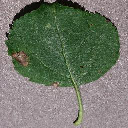

In [43]:
img

In [45]:
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)

In [46]:
pred=(model.predict(x) > 0.5).astype("int32")

In [47]:
pred

array([[1, 0, 0, 0, 0, 0]], dtype=int32)

# VEGETABLE DISEASE TESTING

In [ ]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='RpgN64RdmcoKEDw2E8938nnk7gndChNZWtZL98XUht84',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.eu.cloud-object-storage.appdomain.cloud')

bucket = 'fertilizersrecommendationsystem-donotdelete-pr-gdrmv8hnrpmtwp'
object_key = 'a8d687be-3777-403f-bae7-5c8c19340b3f___RS_HL 1738.JPG'

streaming_body_4 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


In [48]:
model=load_model(r'vegetable.h5')

In [53]:
img=image.load_img(r'Dataset Plant Disease/Veg-dataset/Veg-dataset/test_set/Potato___healthy/a8d687be-3777-403f-bae7-5c8c19340b3f___RS_HL 1738.JPG',grayscale=False,target_size=(128,128))

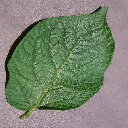

In [54]:
img

In [56]:
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)

In [57]:
pred=(model.predict(x) > 0.5).astype("int32")

In [58]:
pred

array([[0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int32)